# Number of page views each day at freeCodeCamp.org forum

Created by Darío López Díaz. Work in progress..

In this project we will analize the page views from FCC forums, we will visualize the data by year and month using Matplotlib and Seaborn packages. The idea is to detect the months with maximal number of views. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv')
df_dateindex = df.set_index('date')

We perform a 'filtering out' of the days with page views above the top 2.5% of the dataset or bottom 2.5% of the dataset. This filtering out is done in order to avoid statistical errors in data.     

In [ ]:
df_filtered = df_dateindex[(df_dateindex['value'] > df_dateindex['value'].quantile(0.025)) & (df_dateindex['value'] < df_dateindex['value'].quantile(0.975))]

The 'lineplot' of the 'page views vs date' of the filtered data is:  

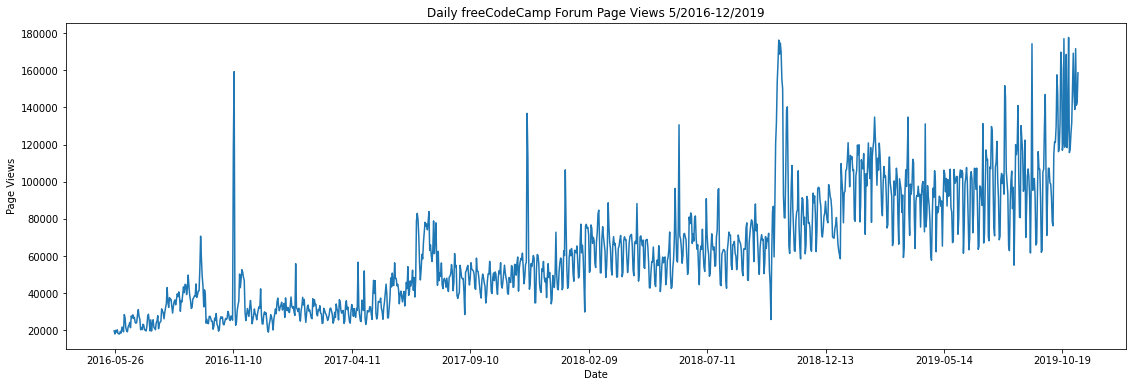

In [ ]:
plt.figure(figsize=(19, 6))
line_plot = plt.plot(df_filtered)
plt.xticks(np.arange(np.argmin(df_filtered), np.argmax(df_filtered), step=152))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

We modify the DataFrame including two new columns by 'Year' and 'Month':&nbsp;&nbsp;

In [ ]:
df_filtered['year'] = pd.DatetimeIndex(df_filtered.index).year
df_filtered['month'] = pd.DatetimeIndex(df_filtered.index).month_name()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now we can plot the 'Page Views' by Months and Years 

<AxesSubplot:xlabel='year', ylabel='value'>

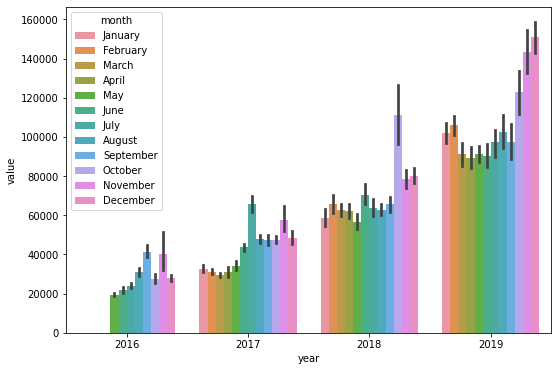

In [ ]:
plt.figure(figsize=(8.7, 6))
sns.barplot(x='year', y='value', hue='month', data=df_filtered , hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

Now, to see wich is the month with more views, we can create a box plot, with the accumulative values along all the years.  

[Text(0, 0, 'May'),
 Text(1, 0, 'June'),
 Text(2, 0, 'July'),
 Text(3, 0, 'August'),
 Text(4, 0, 'September'),
 Text(5, 0, 'October'),
 Text(6, 0, 'November'),
 Text(7, 0, 'December'),
 Text(8, 0, 'January'),
 Text(9, 0, 'February'),
 Text(10, 0, 'March'),
 Text(11, 0, 'April')]

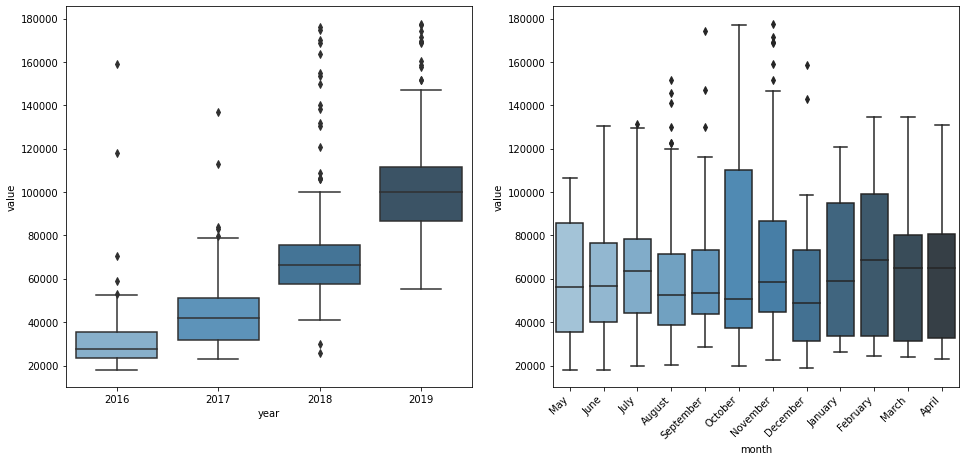

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(16,7))
by_year = sns.boxplot(y='value', x= 'year', data=df_filtered,  orient='v' , ax=axes[0], palette="Blues_d")
by_month = sns.boxplot(y='value', x= 'month', data=df_filtered,  orient='v' , ax=axes[1], palette="Blues_d")
by_month.set_xticklabels(by_month.get_xticklabels(), rotation=45, horizontalalignment='right')

October and February are the months with more accumulative views along all the data. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=24ea27be-4438-48f7-9522-7de49da2b5ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>